In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

# **Import dataset**

In [ ]:
drive.mount('/content/gdrive', force_remount=True)
data = "/content/gdrive/MyDrive/WIA1006/oil_and_gas_data.csv"
oil_df = pd.read_csv(data)

Mounted at /content/gdrive


# **Data Understanding**

In [ ]:
oil_df.shape

(23024, 8)

In [ ]:
oil_df.head(5)

,Symbol,Date,Open,High,Low,Close,Volume,Currency
0,Brent Oil,2000-01-04,23.90,24.70,23.89,24.39,32509,USD
1,Brent Oil,2000-01-05,24.25,24.37,23.70,23.73,30310,USD
2,Brent Oil,2000-01-06,23.55,24.22,23.35,23.62,44662,USD
3,Brent Oil,2000-01-07,23.57,23.98,23.05,23.09,34826,USD
4,Brent Oil,2000-01-10,23.04,23.78,23.04,23.73,26388,USD


In [ ]:
oil_df.columns

Index(['Symbol', 'Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Currency'], dtype='object')

In [ ]:
oil_df.dtypes

Symbol       object
Date         object
Open        float64
High        float64
Low         float64
Close       float64
Volume        int64
Currency     object
dtype: object

In [ ]:
oil_df.describe()

,Open,High,Low,Close,Volume
count,23024.000000,23024.000000,23024.000000,23024.000000,2.302400e+04
mean,33.360681,33.849664,32.849399,33.255359,1.288103e+05
std,36.010741,36.469603,35.521156,35.897015,1.474027e+05
min,-14.000000,0.508500,-16.740000,0.499900,0.000000e+00
25%,2.741000,2.785000,2.695675,2.740875,3.291250e+04
50%,14.364500,15.532500,13.850500,16.414000,7.112050e+04
75%,60.652500,61.500000,59.782500,58.930000,1.786212e+05
max,146.300000,147.500000,144.250000,146.080000,1.404916e+06


# **Data Preparation**

In [ ]:
# Convert date object to datetime
oil_df['Date'] = pd.to_datetime(oil_df['Date'])

In [ ]:
oil_df.dtypes

Symbol              object
Date        datetime64[ns]
Open               float64
High               float64
Low                float64
Close              float64
Volume               int64
Currency            object
dtype: object

In [ ]:
# Check for any null values
oil_df.isna().sum()

Symbol      0
Date        0
Open        0
High        0
Low         0
Close       0
Volume      0
Currency    0
dtype: int64

In [ ]:
# Check for duplicate values
oil_df.loc[oil_df.duplicated()]

,Symbol,Date,Open,High,Low,Close,Volume,Currency


In [ ]:
oil_df.loc[oil_df.duplicated(subset=['Currency'])]

,Symbol,Date,Open,High,Low,Close,Volume,Currency
1,Brent Oil,2000-01-05,24.2500,24.3700,23.7000,23.7300,30310,USD
2,Brent Oil,2000-01-06,23.5500,24.2200,23.3500,23.6200,44662,USD
3,Brent Oil,2000-01-07,23.5700,23.9800,23.0500,23.0900,34826,USD
4,Brent Oil,2000-01-10,23.0400,23.7800,23.0400,23.7300,26388,USD
5,Brent Oil,2000-01-11,23.9000,24.6700,23.8300,24.6200,17410,USD
...,...,...,...,...,...,...,...,...
23019,Heating Oil,2022-06-13,4.3612,4.3762,4.1949,4.2834,46406,USD
23020,Heating Oil,2022-06-14,4.2749,4.4570,4.2488,4.3940,36652,USD
23021,Heating Oil,2022-06-15,4.3816,4.6070,4.3557,4.5470,36908,USD
23022,Heating Oil,2022-06-16,4.5320,4.5825,4.4124,4.5713,28269,USD


In [ ]:
oil_df.query(f'Volume == {0}')

,Symbol,Date,Open,High,Low,Close,Volume,Currency
3581,Brent Oil,2014-01-01,110.9200,110.9200,110.9200,110.9200,0,USD
4356,Brent Oil,2017-01-02,56.8200,56.8200,56.8200,56.8200,0,USD
5727,Brent Oil,2022-04-24,105.0600,105.0600,104.1200,104.5600,0,USD
5728,Brent Oil,2022-04-25,104.6200,104.8900,99.2600,102.2900,0,USD
7389,Crude Oil WTI,2006-07-03,73.9300,73.9300,73.9300,73.9300,0,USD
...,...,...,...,...,...,...,...,...
22983,Heating Oil,2022-04-25,3.6154,3.6863,3.4806,3.6684,0,USD
22987,Heating Oil,2022-04-29,4.9283,5.8595,4.4067,4.7817,0,USD
23008,Heating Oil,2022-05-29,3.9120,3.9245,3.9092,3.9245,0,USD
23009,Heating Oil,2022-05-30,3.9244,3.9913,3.9011,3.9863,0,USD


In [ ]:
# Remove currency column
oil_df = oil_df[['Symbol', 'Date', 'Open', 'High', 'Low', 'Close', 'Volume',
                #  'Currency'
                 ]].copy()

In [ ]:
oil_df.head()

,Symbol,Date,Open,High,Low,Close,Volume
0,Brent Oil,2000-01-04,23.90,24.70,23.89,24.39,32509
1,Brent Oil,2000-01-05,24.25,24.37,23.70,23.73,30310
2,Brent Oil,2000-01-06,23.55,24.22,23.35,23.62,44662
3,Brent Oil,2000-01-07,23.57,23.98,23.05,23.09,34826
4,Brent Oil,2000-01-10,23.04,23.78,23.04,23.73,26388


In [ ]:
oil_df_list = [d for _, d in oil_df.groupby(['Symbol'])]

<Axes: xlabel='Date'>

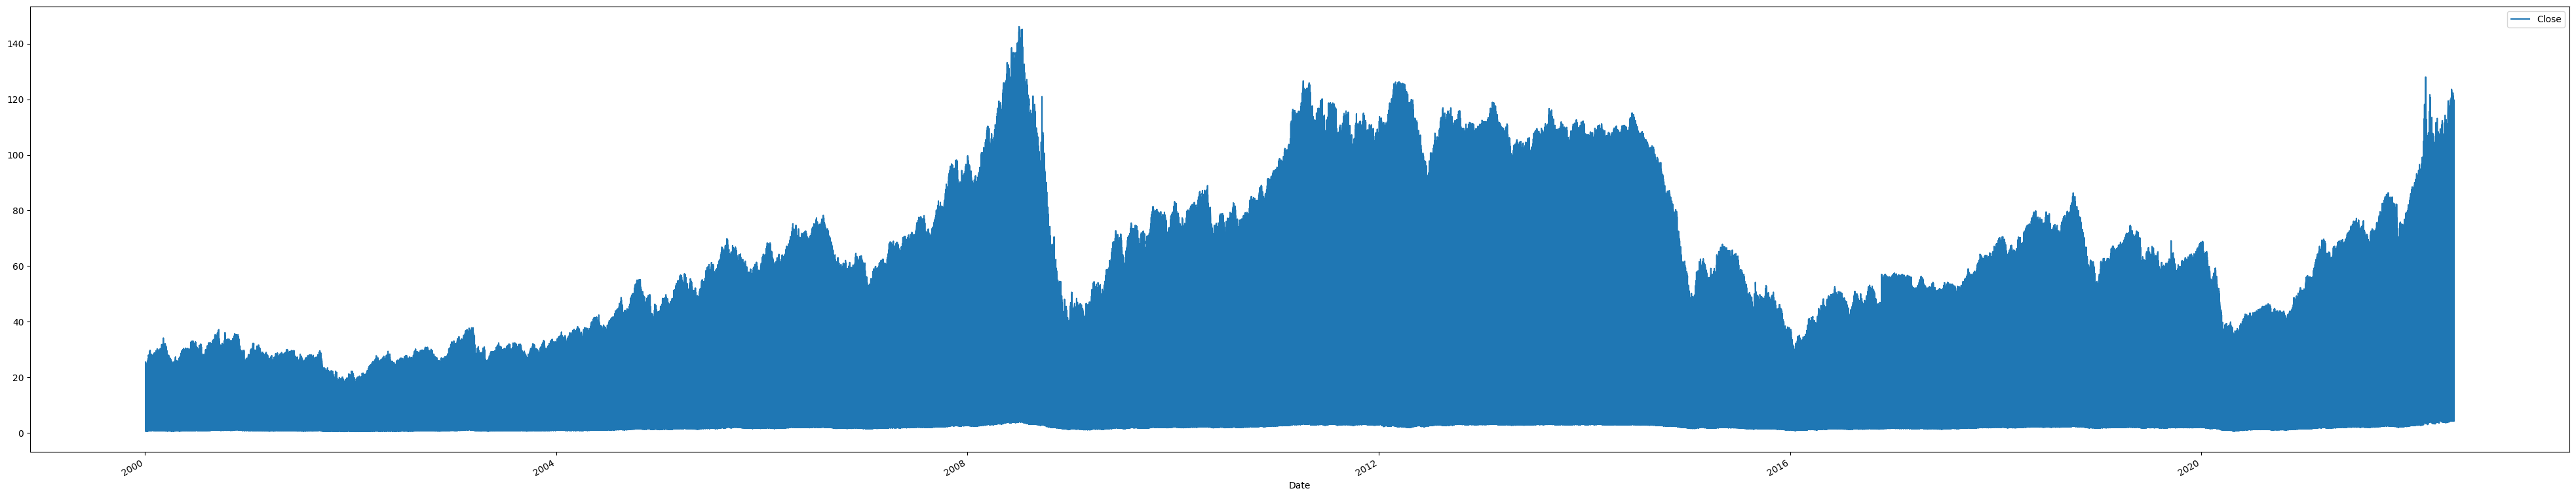

In [ ]:
oil_df.plot(legend=True, x='Date', y='Close', figsize=(50, 10))

# **Feature Understanding**

<Axes: xlabel='Date'>

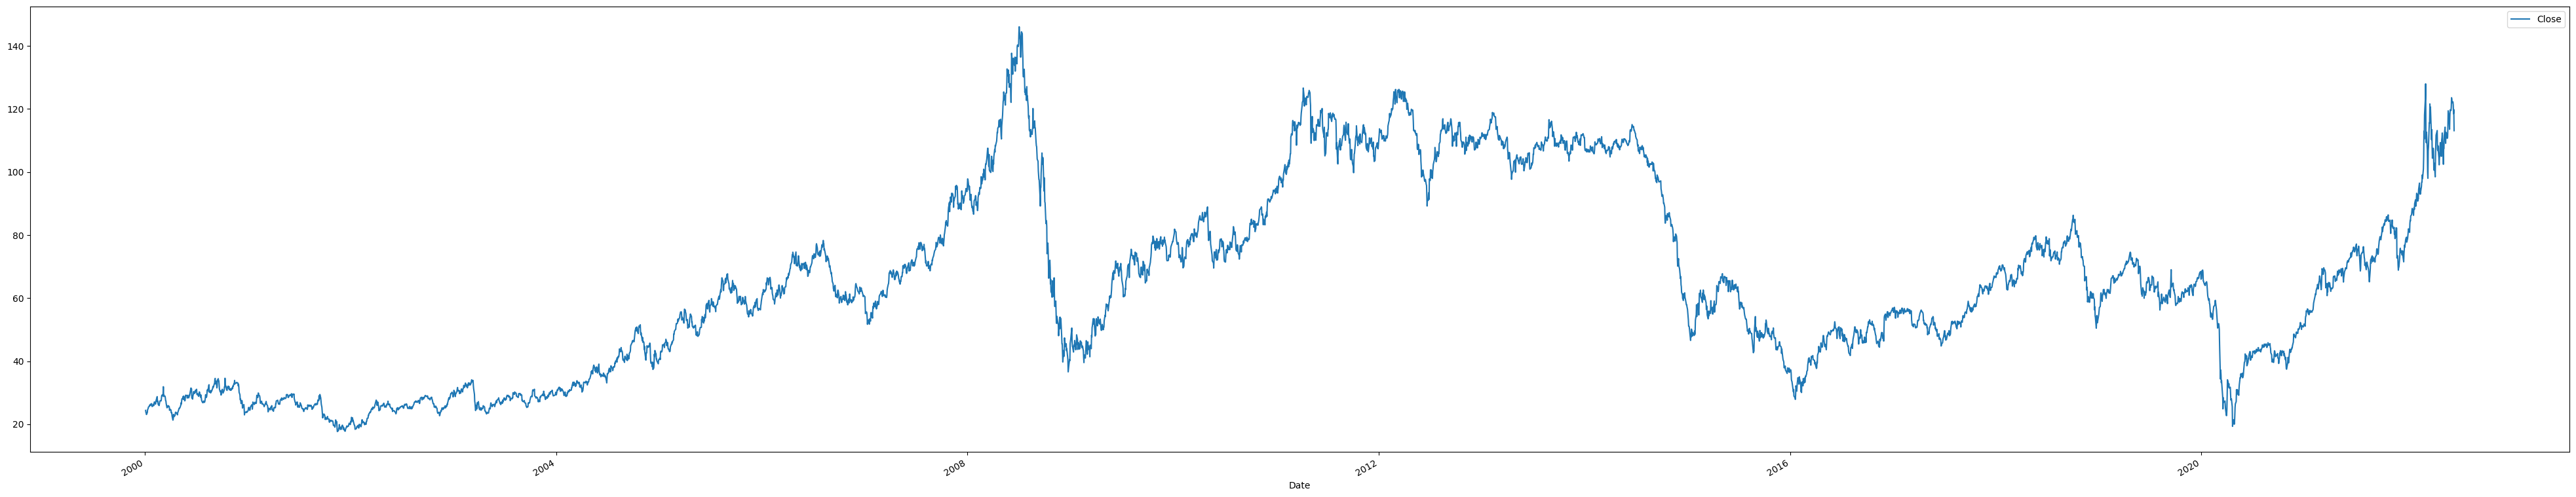

In [ ]:
brent_oil = oil_df_list[0]
brent_oil.plot(legend=True, x='Date', y='Close', figsize=(50, 10))

<Axes: xlabel='Date'>

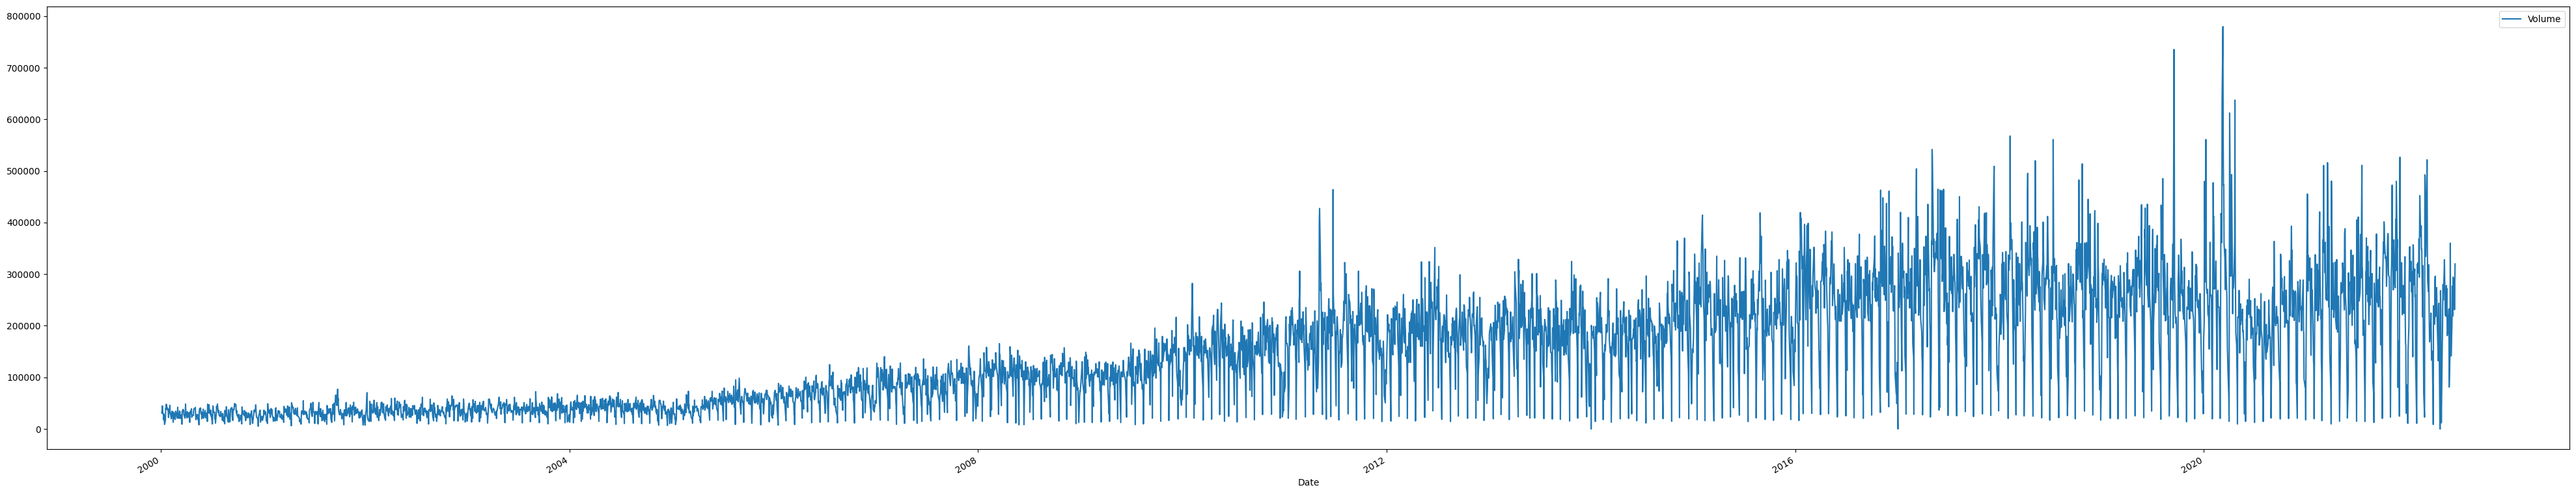

In [ ]:
brent_oil.plot(legend=True, x='Date', y='Volume', figsize=(50, 10))

In [ ]:
crude = oil_df_list[1];
crude.head()

,Symbol,Date,Open,High,Low,Close,Volume
5768,Crude Oil WTI,2000-01-04,25.20,25.69,24.71,25.55,74788
5769,Crude Oil WTI,2000-01-05,25.50,25.61,24.87,24.91,70944
5770,Crude Oil WTI,2000-01-06,24.80,25.34,24.51,24.78,85252
5771,Crude Oil WTI,2000-01-07,24.65,25.00,24.15,24.22,91828
5772,Crude Oil WTI,2000-01-10,24.22,24.75,24.02,24.67,68901


<Axes: xlabel='Date'>

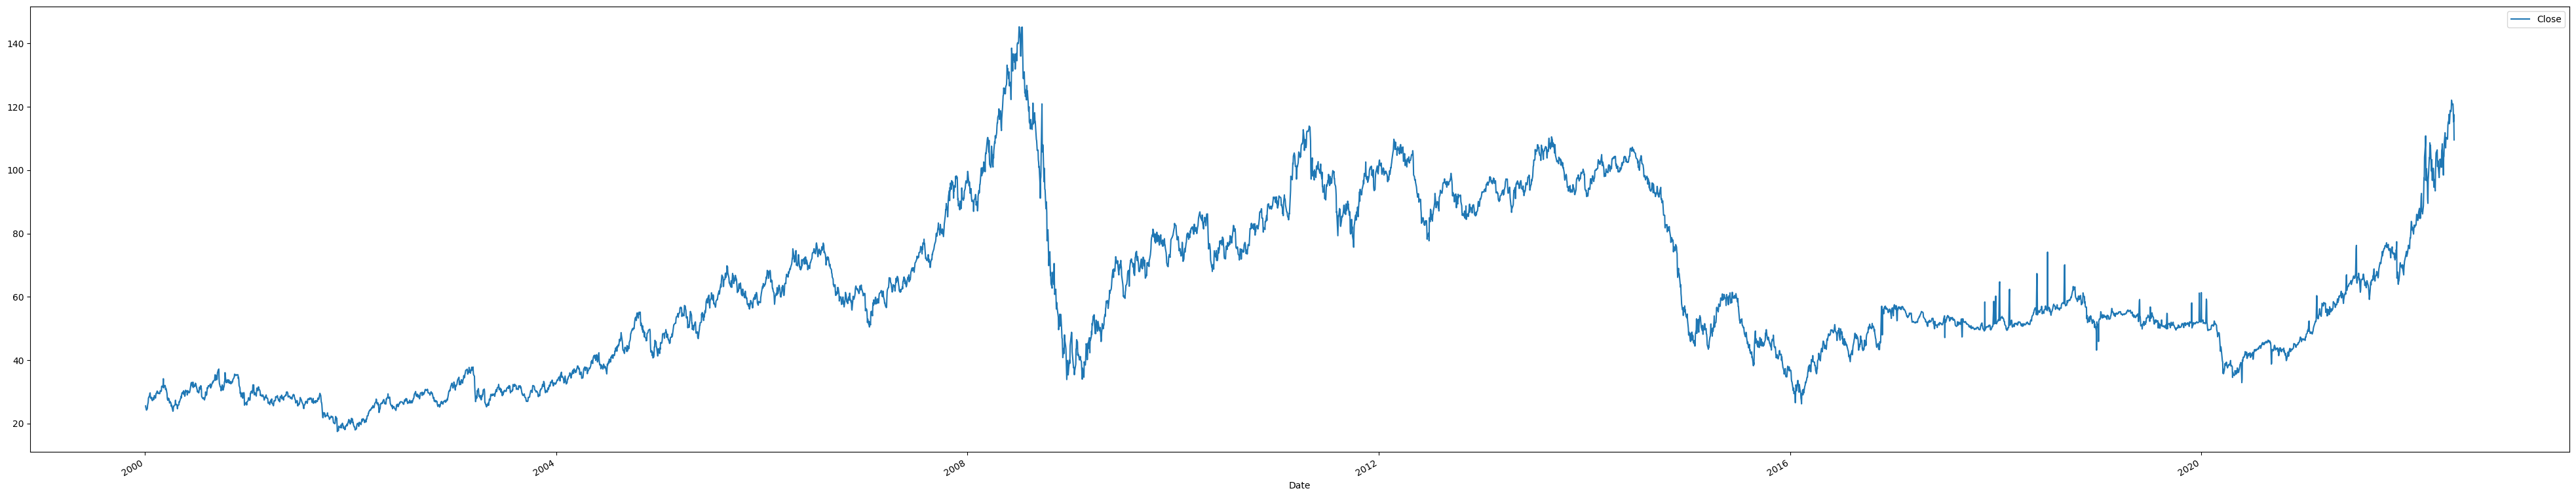

In [ ]:
crude.plot(legend=True, x='Date', y='Close', figsize=(50, 10))

In [ ]:
heating = oil_df_list[2]

<Axes: xlabel='Date'>

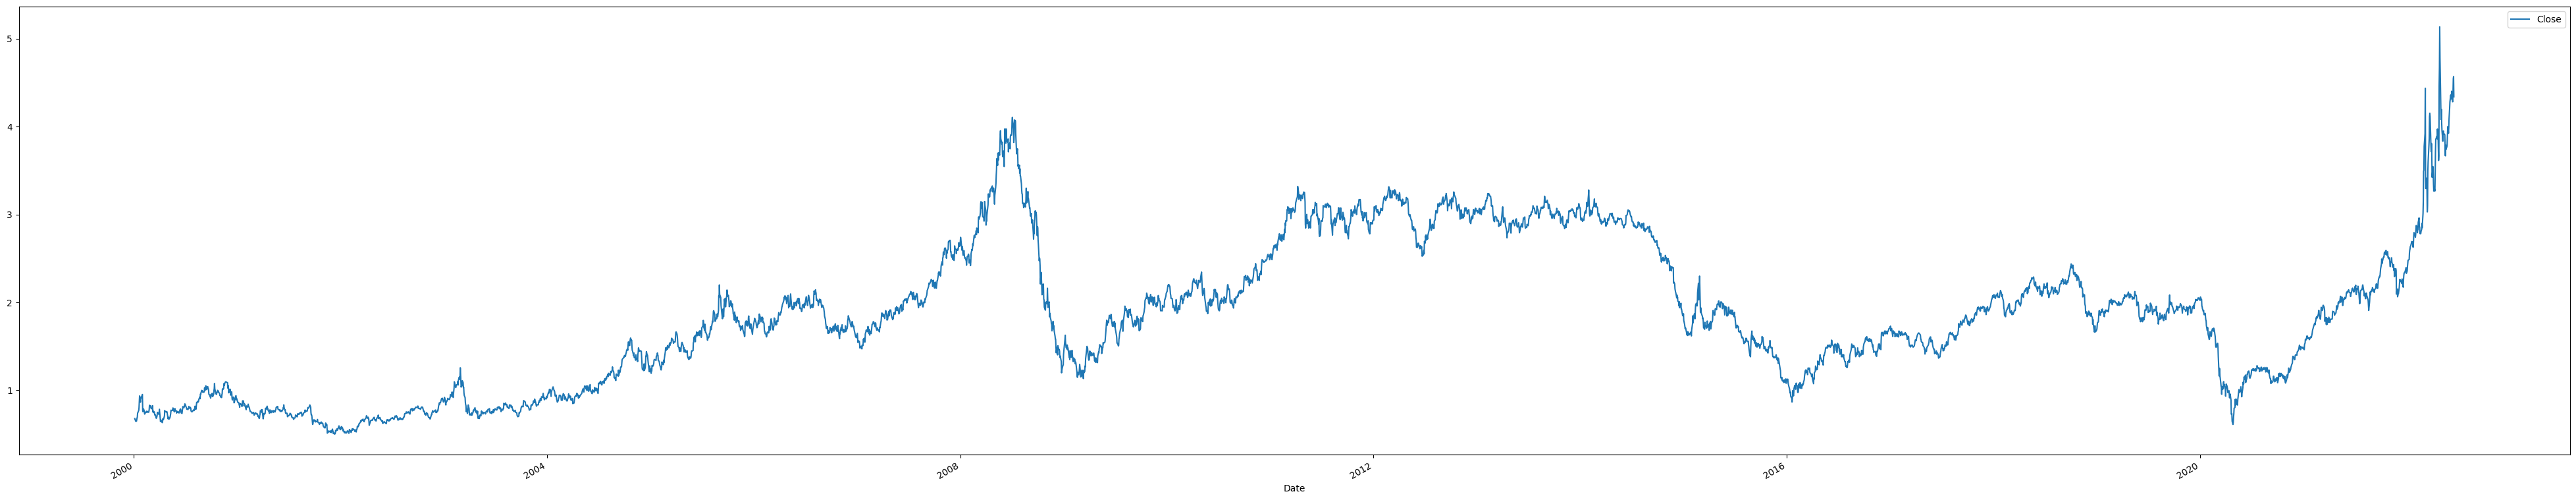

In [ ]:
heating.plot(legend=True, x='Date', y='Close', figsize=(50, 10))

In [ ]:
natural = oil_df_list[3]

<Axes: xlabel='Date'>

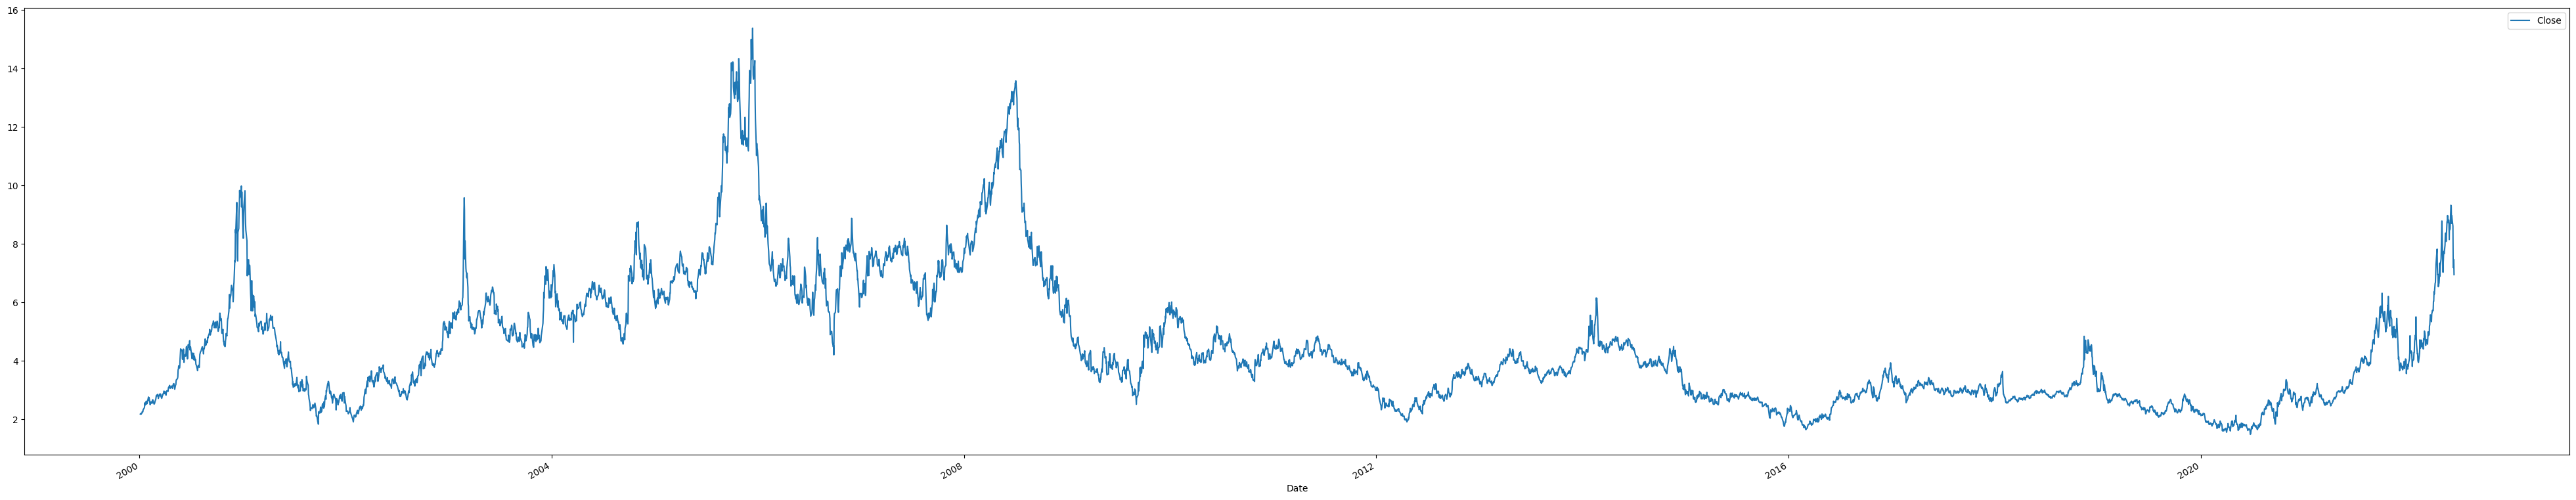

In [ ]:
natural.plot(legend=True, x='Date', y='Close', figsize=(50, 10))

In [ ]:
brent_oil.columns

Index(['Symbol', 'Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

In [ ]:
brent_oil = brent_oil[[# 'Symbol',
                       'Date', 'Open', 'High', 'Low', 'Close', 'Volume']
                      ].copy()

<Axes: ylabel='Frequency'>

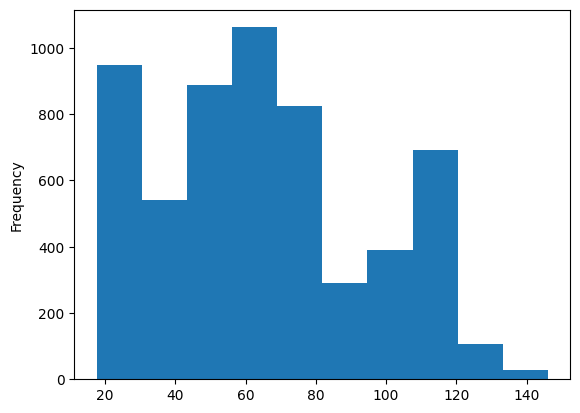

In [ ]:
brent_oil['Close'].plot(kind='hist')

<Axes: >

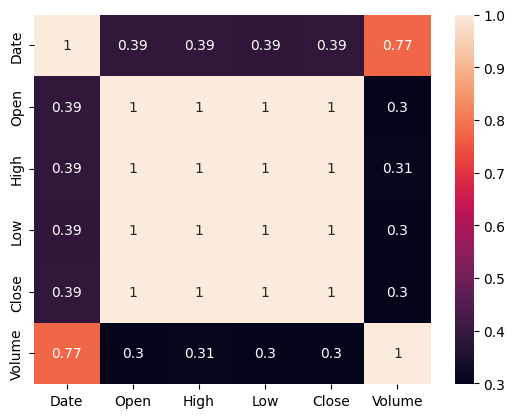

In [ ]:
sns.heatmap(brent_oil.corr(), annot=True)

# **Training the model**

## **Splitting dataset**

In [ ]:
from sklearn.model_selection import train_test_split
X = brent_oil[['Open', 'Low', 'High', 'Volume']]
y = brent_oil[['Close']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## **Model Selection**

In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

## **Train the model**

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svr_model = SVR(kernel='rbf', C=100, epsilon=0.1)

svr_model.fit(X_train_scaled, y_train)

predictions = svr_model.predict(X_test_scaled)

mse = mean_squared_error(y_test, predictions)

print(predictions)

print("Mean Squared Error: ", mse)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[118.45402772  63.9255317   93.0946107  ... 108.67338565  33.10604241
 110.91647285]
Mean Squared Error:  0.4540906072045043


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV

scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

params = {
    'kernel': ['linear', 'rbf'],
    'C': [1, 10, 50, 100],
    'epsilon': [0.01, 0.1, 0.2, 0.5]
}

svr = SVR()


grid_search = GridSearchCV(svr, params, cv=5, scoring='neg_mean_squared_error', n_jobs=1)
grid_search.fit(X_train_normalized, y_train)

best_params = grid_search.best_params_

best_model = SVR(**best_params)
best_model.fit(X_train_normalized, y_train)

predictions = best_model.predict(X_test_normalized)

mse = mean_squared_error(y_test, predictions)

print("Best params: ", best_params)
print("Mean squared error: ", mse)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Best params:  {'C': 100, 'epsilon': 0.2, 'kernel': 'linear'}
Mean squared error:  0.27539759191440866


In [ ]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, predictions)
accuracy = r2 * 100
print("Accuracy(%): ", accuracy)

Accuracy(%):  99.96769904223352
